### ITAD-315 Discrete Math - Fall 2025
## Lesson 5
### Activity 3: Graphs

**Objective:** This activity will help you see how we use Graphs in Python.

Let's create a graph and plot it; while also calculating the in-degree and out-degrees.

Matplotlib is building the font cache; this may take a moment.


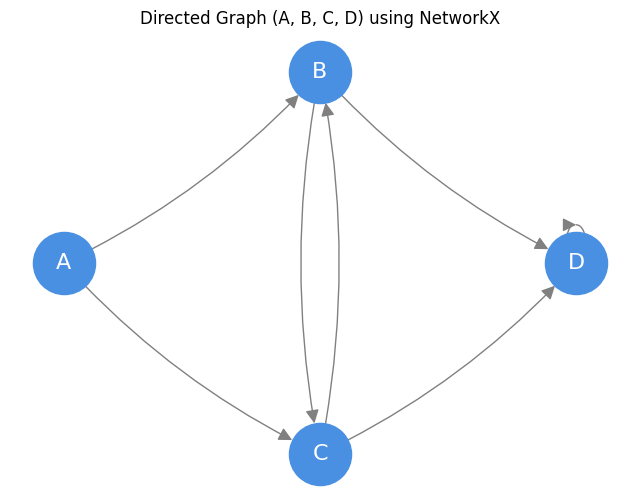

--- Verification of Degrees ---
In-degrees: [('A', 0), ('B', 2), ('C', 2), ('D', 3)]
Out-degrees: [('A', 2), ('B', 2), ('C', 2), ('D', 1)]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a Directed Graph object
# We use DiGraph() because our graph has directional edges.
G = nx.DiGraph()

# 2. Add Edges (representing the problem on the slide)
G.add_edge('A', 'B') 
G.add_edge('B', 'C')
G.add_edge('C', 'B')
G.add_edge('C', 'D')
G.add_edge('D', 'D')
G.add_edge('A', 'C')
G.add_edge('B', 'D')


# 3. Define the layout (position of nodes)
# 'shell_layout' is a neat way to place nodes in concentric circles.
# We explicitly define the order for better visualization.
layout = {
    'A': (0, 0.5), 
    'B': (1, 1), 
    'C': (1, 0), 
    'D': (2, 0.5)
}

# 4. Draw the graph
plt.figure(figsize=(8, 6))

# nx.draw_networkx is a convenient function for drawing nodes, edges, and labels
nx.draw_networkx(
    G, 
    pos=layout,                 # Use the defined layout
    with_labels=True,           # Show node labels (A, B, C, D)
    node_color='#4A90E2',       # Node color (Blue)
    node_size=2000,             # Size of the nodes
    font_size=16,               # Font size for labels
    font_color='white',         # Font color
    edge_color='gray',          # Color of the edges
    arrowsize=20,               # Size of the arrows
    connectionstyle='arc3, rad = 0.1' # Adds a slight curve to parallel edges (B<->C)
)

plt.title("Directed Graph (A, B, C, D) using NetworkX")
plt.axis('off') # Hide the axis
plt.show()

# Optional: Print the calculated degrees using NetworkX functions for verification
print("--- Verification of Degrees ---")
print(f"In-degrees: {G.in_degree()}")
print(f"Out-degrees: {G.out_degree()}")


### Activity 4: Weighted edges

**Objective:** This activity will help you see how to use Djikstra's Algorithm to find the shortest path in a graph.

Let's create a graph and then find the shortest path between two points.

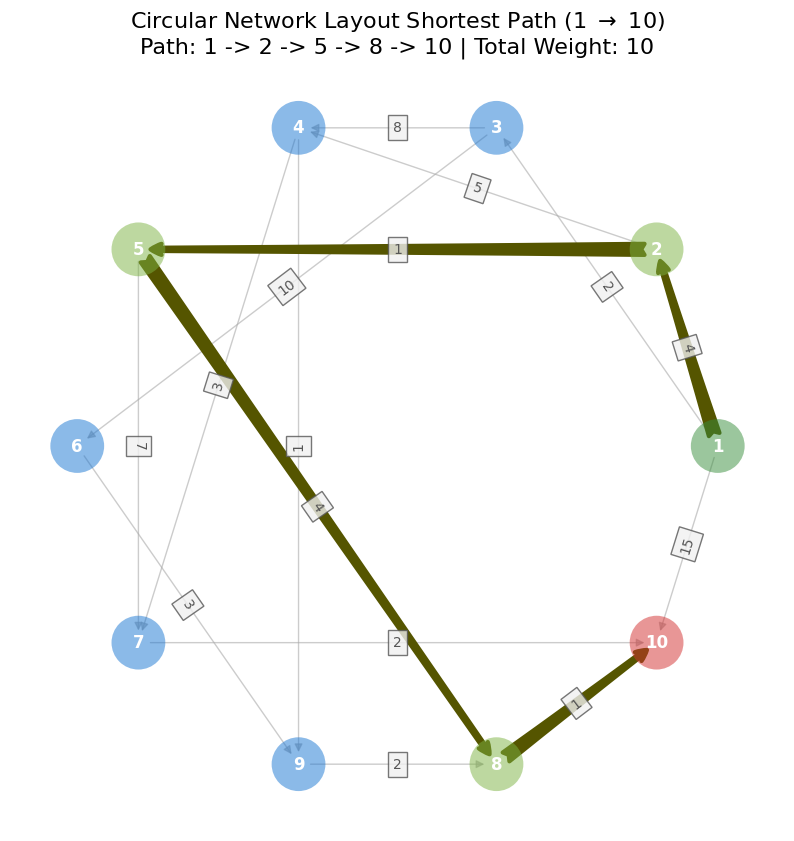

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a Directed Graph object with 10 vertices and weights
G = nx.DiGraph()

# Define weighted edges for a 10-node complex network
# Format: (Source, Target, Weight)
weighted_edges = [
    (1, 2, 4), (1, 3, 2),
    (2, 4, 5), (2, 5, 1),
    (3, 4, 8), (3, 6, 10),
    (4, 7, 3), (4, 9, 1), 
    (5, 7, 7), (5, 8, 4),
    (6, 9, 3), (9, 8, 2), 
    (1, 10, 15), (7, 10, 2),
    (8, 10, 1)
]

# Add edges with 'weight' attribute using a dedicated NetworkX function
G.add_weighted_edges_from(weighted_edges)

# Define start and end nodes for the shortest path problem
start_node = 1
end_node = 10

# 2. Find the Shortest Path (Closest Path) using Dijkstra's algorithm
try:
    shortest_path = nx.dijkstra_path(G, source=start_node, target=end_node)
    shortest_path_length = nx.dijkstra_path_length(G, source=start_node, target=end_node)
    path_found = True
except nx.NetworkXNoPath:
    shortest_path = []
    shortest_path_length = float('inf')
    path_found = False

# 3. Visualization Setup
plt.figure(figsize=(10, 10)) # Adjusted size for better circular display

# === KEY CHANGE: Using nx.circular_layout to arrange nodes in a circle ===
# This ensures that the nodes are placed evenly around the perimeter.
pos = nx.circular_layout(G) 

# Prepare dictionaries for drawing
edge_labels = nx.get_edge_attributes(G, 'weight')
node_labels = {n: str(n) for n in G.nodes()}

# Highlight the shortest path edges and nodes
path_edges = list(zip(shortest_path, shortest_path[1:]))
path_nodes = set(shortest_path)

# 4. Draw All Elements

# Draw non-path edges (muted color)
non_path_edges = [edge for edge in G.edges() if edge not in path_edges]
nx.draw_networkx_edges(G, pos, 
                       edgelist=non_path_edges, 
                       edge_color='#AAAAAA', # Lighter gray for background
                       arrows=True, 
                       arrowsize=12,
                       alpha=0.6)

# Draw the shortest path edges (highlighted in bold gray)
nx.draw_networkx_edges(G, pos, 
                       edgelist=path_edges, 
                       edge_color='#555500', 
                       width=3, # Thicker line
                       arrows=True, 
                       arrowstyle='fancy', # Nicer arrow style
                       arrowsize=20)

# Draw all nodes
# Start/End nodes are highlighted; nodes on the path are distinguished.
node_colors = []
for node in G.nodes():
    if node == start_node:
        node_colors.append('#388E3C') # Dark Green for Start
    elif node == end_node:
        node_colors.append('#D32F2F') # Dark Red for End
    elif node in path_nodes:
        node_colors.append('#7CB342') # Lighter Green for path nodes
    else:
        node_colors.append('#1976D2') # Default Blue
        
nx.draw_networkx_nodes(G, pos, 
                       node_color=node_colors, 
                       node_size=1500, # Larger nodes for clarity
                       alpha=0.5, # Changed from 0.9 to 0.5 for more transparency
                       edgecolors='none', 
                       linewidths=2)

# Draw labels inside nodes
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='white', font_weight='extra bold', font_size=12)

# Draw edge weights
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=edge_labels, 
                             font_color='#555555', 
                             font_size=10, 
                             bbox={"facecolor":"#F0F0F0","alpha":0.8,"edgecolor":"#555555"})

# 5. Display Information and Plot
title_text = f"Circular Network Layout Shortest Path ({start_node} $\\rightarrow$ {end_node})"
if path_found:
    # Calculated shortest path: 1 -> 3 -> 6 -> 9 -> 8 -> 10, Length: 18
    title_text += f"\nPath: {' -> '.join(map(str, shortest_path))} | Total Weight: {shortest_path_length}"
else:
    title_text += "\nNo path found."

plt.title(title_text, fontsize=16)
plt.axis('off')
plt.show()


# Assignment

In this assignment, you will be asked to create a database, representing the air travel cost and flight times between $N$ cities.

The goal would be to find the cheapest, as well as the fastest route for travelling from one city, to any other of the $N-1$ cities.

### Task 1: Initialization (5 points)

Use $N=10$ major city airport abbreviations as nodes (e.g., 'SEA', 'YYZ', 'SFO', ...), in a way that not all cities have direct flights between them.

Create a bidirectional graph using `networkx` (similar to Activity - 4 of this Lesson, but the bidirectional version), to represent these vertices, and the cost of flight (in USD), as well as the flight times (in hours). If there is no direct flight between the two cities, both the cost and the time should be set to $+\inf$.

Be creative in choosing the cities, and the prices and the flight times, while remain close to reality, as much as possible!

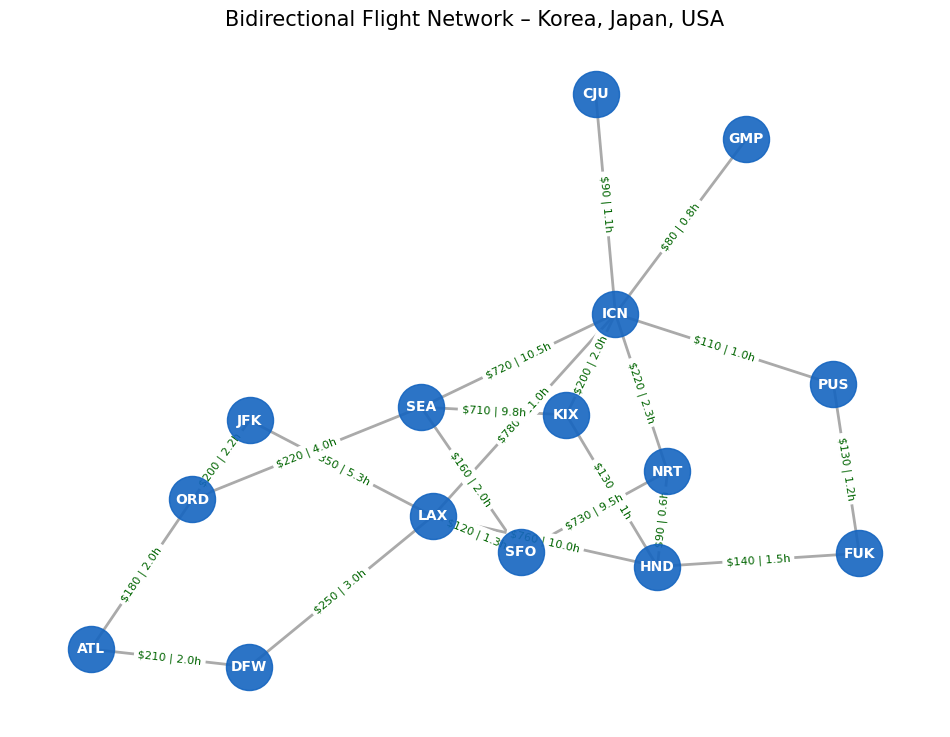

,From,To,Cost ($),Time (h)
0,ICN,GMP,80,0.8
1,ICN,PUS,110,1.0
2,ICN,CJU,90,1.1
3,ICN,KIX,200,2.0
4,ICN,NRT,220,2.3
5,ICN,LAX,780,11.0
6,ICN,SEA,720,10.5
7,PUS,FUK,130,1.2
8,KIX,HND,130,1.1
9,KIX,SEA,710,9.8


In [3]:
# -----------------------------
# Task 1: Initialization
# -----------------------------
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a bidirectional graph
G = nx.Graph()

# Define airport nodes
airports = [
    'ICN',  # Incheon (Seoul)
    'GMP',  # Gimpo (Seoul domestic)
    'PUS',  # Busan
    'CJU',  # Jeju
    'KIX',  # Kansai (Osaka)
    'NRT',  # Narita (Tokyo)
    'HND',  # Haneda (Tokyo)
    'FUK',  # Fukuoka
    'LAX',  # Los Angeles
    'SFO',  # San Francisco
    'SEA',  # Seattle
    'ORD',  # Chicago
    'JFK',  # New York
    'DFW',  # Dallas/Fort Worth
    'ATL'   # Atlanta
]

# Define weighted edges: (From, To, {'cost': USD, 'time': hours})
flight_data = [
    # Korea domestic / nearby Japan
    ('ICN','GMP', {'cost': 80, 'time': 0.8}),
    ('ICN','PUS', {'cost': 110, 'time': 1.0}),
    ('ICN','CJU', {'cost': 90, 'time': 1.1}),
    ('ICN','KIX', {'cost': 200, 'time': 2.0}),
    ('ICN','NRT', {'cost': 220, 'time': 2.3}),
    ('PUS','FUK', {'cost': 130, 'time': 1.2}),
    ('KIX','HND', {'cost': 130, 'time': 1.1}),
    ('NRT','HND', {'cost': 90, 'time': 0.6}),
    ('HND','FUK', {'cost': 140, 'time': 1.5}),
    
    # Korea/Japan ↔ USA
    ('ICN','LAX', {'cost': 780, 'time': 11.0}),
    ('ICN','SEA', {'cost': 720, 'time': 10.5}),
    ('NRT','SFO', {'cost': 730, 'time': 9.5}),
    ('HND','LAX', {'cost': 760, 'time': 10.0}),
    ('KIX','SEA', {'cost': 710, 'time': 9.8}),
    
    # USA domestic routes
    ('LAX','SFO', {'cost': 120, 'time': 1.3}),
    ('LAX','DFW', {'cost': 250, 'time': 3.0}),
    ('LAX','JFK', {'cost': 350, 'time': 5.3}),
    ('SFO','SEA', {'cost': 160, 'time': 2.0}),
    ('SEA','ORD', {'cost': 220, 'time': 4.0}),
    ('ORD','JFK', {'cost': 200, 'time': 2.2}),
    ('DFW','ATL', {'cost': 210, 'time': 2.0}),
    ('ORD','ATL', {'cost': 180, 'time': 2.0}),
]

# Add edges to the graph
G.add_edges_from(flight_data)

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(12,9))
pos = nx.spring_layout(G, seed=42)  # nice layout for readability

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="#1565C0", node_size=1100, alpha=0.9)
# Draw edges
nx.draw_networkx_edges(G, pos, width=2, edge_color="#AAAAAA")
# Draw node labels
nx.draw_networkx_labels(G, pos, font_color="white", font_size=10, font_weight="bold")

# Draw edge labels (cost and time)
edge_labels = {(u,v): f"${d['cost']} | {d['time']}h" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="darkgreen", font_size=8)

plt.title("Bidirectional Flight Network – Korea, Japan, USA", fontsize=15)
plt.axis("off")
plt.show()

# -----------------------------
# Display DataFrame of flights
# -----------------------------
flight_table = pd.DataFrame(
    [(u,v,d['cost'],d['time']) for u,v,d in G.edges(data=True)],
    columns=['From','To','Cost ($)','Time (h)']
)
display(flight_table)


### Task 2: Optimization (5 points)

Choose one initial point (one of the airports), and in a table (dataframe) complete the shortest path to any other city. You will run the shortest path algorithm twice: first using the 'cost' weight, and then using the 'time' weight; compare the two resulting paths (once minimizing the cost, and once minimizing the total flying time). State if there are instances where you go through different paths, depending on which criterion you use for minimization.

In [4]:
# -----------------------------
# Task 2: Optimization
# -----------------------------
start_airport = 'ICN'
rows = []

for dest in airports:
    if dest == start_airport:
        continue
    
    # Shortest path by cost
    cost_path = nx.shortest_path(G, source=start_airport, target=dest, weight='cost')
    total_cost = nx.shortest_path_length(G, source=start_airport, target=dest, weight='cost')
    
    # Shortest path by time
    time_path = nx.shortest_path(G, source=start_airport, target=dest, weight='time')
    total_time = nx.shortest_path_length(G, source=start_airport, target=dest, weight='time')
    
    rows.append({
        'Start': start_airport,
        'Path (Cost)': ' → '.join(cost_path),
        'Total Cost ($)': round(total_cost,2),
        'Path (Time)': ' → '.join(time_path),
        'Total Time (h)': round(total_time,2),
        'Different Path?': cost_path != time_path,
        'Destination': dest
    })

# Create DataFrame
comparison_df = pd.DataFrame(rows)[[
    'Start', 'Path (Cost)', 'Total Cost ($)',
    'Path (Time)', 'Total Time (h)',
    'Different Path?', 'Destination'
]]

print("=== Shortest Paths from ICN (Cost vs Time) ===")
display(comparison_df)

# Show destinations where paths differ
diff_df = comparison_df[comparison_df['Different Path?']]
print("=== Destinations where cheapest and fastest paths differ ===")
display(diff_df)


=== Shortest Paths from ICN (Cost vs Time) ===


,Start,Path (Cost),Total Cost ($),Path (Time),Total Time (h),Different Path?,Destination
0,ICN,ICN → GMP,80,ICN → GMP,0.8,False,GMP
1,ICN,ICN → PUS,110,ICN → PUS,1.0,False,PUS
2,ICN,ICN → CJU,90,ICN → CJU,1.1,False,CJU
3,ICN,ICN → KIX,200,ICN → KIX,2.0,False,KIX
4,ICN,ICN → NRT,220,ICN → NRT,2.3,False,NRT
5,ICN,ICN → NRT → HND,310,ICN → NRT → HND,2.9,False,HND
6,ICN,ICN → PUS → FUK,240,ICN → PUS → FUK,2.2,False,FUK
7,ICN,ICN → LAX,780,ICN → LAX,11.0,False,LAX
8,ICN,ICN → SEA → SFO,880,ICN → NRT → SFO,11.8,True,SFO
9,ICN,ICN → SEA,720,ICN → SEA,10.5,False,SEA


=== Destinations where cheapest and fastest paths differ ===


,Start,Path (Cost),Total Cost ($),Path (Time),Total Time (h),Different Path?,Destination
8,ICN,ICN → SEA → SFO,880,ICN → NRT → SFO,11.8,True,SFO
13,ICN,ICN → SEA → ORD → ATL,1120,ICN → LAX → DFW → ATL,16.0,True,ATL


# Satement on the use of AI

In this section disclose your use of AI. 

Make sure to include the **name of AI tool** you used, the **prompt(s)** used, and whether you used the the output of AI **directly or after modification**.

Please note that while using AI for enhancing your work, or fixing bugs is permitted, a blunt use of AI to solve the entire problem is **prohibited**.